### 3-Emotion Model

In [190]:
from emotion_recognition import EmotionRecognizer
from sklearn.svm import SVC
# init a model, let's use SVC
my_model = SVC()
# pass my model to EmotionRecognizer instance
# and balance the dataset
rec = EmotionRecognizer(model=my_model, emotions=['sad', 'neutral', 'happy'], balance=True, verbose=0)
# train the model
rec.train()
# check the test accuracy for that model
print("Test score:", rec.test_score())
# check the train accuracy for that model
print("Train score:", rec.train_score())

[+] Model trained
Test score: 0.5666666666666667
Train score: 0.5666666666666667


In [9]:
print("Prediction:", rec.predict("data/test-custom/zakiC_neutral.wav"))

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57

NotImplementedError: Converting the audio files failed, make sure `ffmpeg` is installed in your machine and added to PATH.

### 5-Emotion Model

In [15]:
from deep_emotion_recognition import DeepEmotionRecognizer
# initialize instance
# inherited from emotion_recognition.EmotionRecognizer
# default parameters (LSTM: 128x2, Dense:128x2)
# ps = pleasant surprise
deeprec = DeepEmotionRecognizer(emotions=['angry', 'sad', 'neutral', 'ps', 'happy'], n_rnn_layers=6, n_dense_layers=6, rnn_units=256, dense_units=128)
# train the model
deeprec.train()
# get the accuracy
print(deeprec.test_score())

[+] Generated TESS & RAVDESS DB CSV File
[EMO-DB] Total files to write: 0
[EMO-DB] Training samples: 0
[EMO-DB] Testing samples: 0
[+] Generated EMO-DB CSV File
[Custom Dataset] There are 9 training audio files for category:angry
[Custom Dataset] There are 9 testing audio files for category:angry
[Custom Dataset] There are 9 training audio files for category:sad
[Custom Dataset] There are 9 testing audio files for category:sad
[Custom Dataset] There are 9 training audio files for category:neutral
[Custom Dataset] There are 9 testing audio files for category:neutral
[Custom Dataset] There are 9 training audio files for category:ps
[Custom Dataset] There are 9 testing audio files for category:ps
[Custom Dataset] There are 9 training audio files for category:happy
[Custom Dataset] There are 9 testing audio files for category:happy
[+] Generated Custom DB CSV File
[+] Data loaded
[+] Model created
[*] Model weights loaded
1/1 [==============================] - 1s 755ms/step
0.22


In [3]:
print(deeprec.predict_proba("data/emodb/wav/16a01Wb.wav"))

1/1 [==============================] - 0s 10ms/step
{'angry': 0.99999225, 'sad': 2.0336067e-06, 'neutral': 4.1021238e-07, 'ps': 5.256916e-06, 'happy': 9.589372e-09}


In [10]:
print(deeprec.confusion_matrix(percentage=True, labeled=True))

1/1 [==============================] - 0s 25ms/step
              predicted_angry  predicted_sad  predicted_neutral  predicted_ps  \
true_angry                0.0            0.0          40.000000     40.000000   
true_sad                 10.0           10.0          20.000000     30.000002   
true_neutral              0.0           10.0          50.000000     20.000000   
true_ps                  20.0           10.0          30.000002     40.000000   
true_happy                0.0            0.0          10.000000     50.000000   

              predicted_happy  
true_angry          20.000000  
true_sad            30.000002  
true_neutral        20.000000  
true_ps              0.000000  
true_happy          40.000000  


### Looping File Conversion

In [1]:
import os

folder_path = "data/test-custom/lane"  # Replace with the path to your folder
out_folder_path = "data/test-custom/lane/output"

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        # Construct the input and output file paths
        input_file = os.path.join(folder_path, filename)
        output_filename = os.path.splitext(filename)[0] + ".wav"
        output_file = os.path.join(out_folder_path, output_filename)

        # Generate the ffmpeg command with the appropriate file names
        ffmpeg_command = f"ffmpeg -i {input_file} -ac 1 -ar 16000 {output_file}"

        # Execute the ffmpeg command
        os.system(ffmpeg_command)

        print(f"Converted {input_file} to {output_file}")


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57

Converted data/test-custom/lane/Texas_AM_11_08_21.wav to data/test-custom/lane/output/Texas_AM_11_08_21.wav


size=   18778kB time=00:10:00.89 bitrate= 256.0kbits/s speed=2.01e+03x    
video:0kB audio:18778kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001186%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Kentucky_09_28_20.wav to data/test-custom/lane/output/Kentucky_09_28_20.wav


size=   19904kB time=00:10:36.91 bitrate= 256.0kbits/s speed=1.91e+03x    
video:0kB audio:19903kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001040%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Central_Arkansas_09_05_22.wav to data/test-custom/lane/output/Central_Arkansas_09_05_22.wav


size=   28227kB time=00:15:03.24 bitrate= 256.0kbits/s speed=2.01e+03x    
video:0kB audio:28226kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000733%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Vanderbilt_10_03_22.wav to data/test-custom/lane/output/Vanderbilt_10_03_22.wav


size=   19297kB time=00:10:17.51 bitrate= 256.0kbits/s speed=1.93e+03x    
video:0kB audio:19297kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001134%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/LSU_09_25_23.wav to data/test-custom/lane/output/LSU_09_25_23.wav


size=   21687kB time=00:11:33.97 bitrate= 256.0kbits/s speed=1.88e+03x    
video:0kB audio:21687kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001108%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Liberty_11_01_21.wav to data/test-custom/lane/output/Liberty_11_01_21.wav


size=   22348kB time=00:11:55.11 bitrate= 256.0kbits/s speed=1.89e+03x    
video:0kB audio:22347kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001014%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Auburn_10_19_20.wav to data/test-custom/lane/output/Auburn_10_19_20.wav


size=   16378kB time=00:08:44.09 bitrate= 256.0kbits/s speed=1.91e+03x    
video:0kB audio:16378kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001383%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Louisville_08_31_21.wav to data/test-custom/lane/output/Louisville_08_31_21.wav


size=   21635kB time=00:11:32.30 bitrate= 256.0kbits/s speed=1.87e+03x    
video:0kB audio:21635kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001029%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Alabama_09_18_23.wav to data/test-custom/lane/output/Alabama_09_18_23.wav


size=   24106kB time=00:12:51.39 bitrate= 256.0kbits/s speed=1.9e+03x    
video:0kB audio:24106kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000924%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.1

Converted data/test-custom/lane/Mercer_08_28_23.wav to data/test-custom/lane/output/Mercer_08_28_23.wav


size=   22372kB time=00:11:55.88 bitrate= 256.0kbits/s speed=1.9e+03x    
video:0kB audio:22371kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001021%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.1

Converted data/test-custom/lane/Indiana_12_28_20.wav to data/test-custom/lane/output/Indiana_12_28_20.wav


size=   17287kB time=00:09:13.16 bitrate= 256.0kbits/s speed=1.84e+03x    
video:0kB audio:17287kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001322%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Mississippi_State_11_23_20.wav to data/test-custom/lane/output/Mississippi_State_11_23_20.wav


size=   21342kB time=00:11:22.92 bitrate= 256.0kbits/s speed=1.86e+03x    
video:0kB audio:21341kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000979%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Texas_A_M_10_24_22.wav to data/test-custom/lane/output/Texas_A_M_10_24_22.wav


size=   20516kB time=00:10:56.49 bitrate= 256.0kbits/s speed=1.91e+03x    
video:0kB audio:20516kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001114%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/LSU_12_14_20.wav to data/test-custom/lane/output/LSU_12_14_20.wav


size=   25065kB time=00:13:22.07 bitrate= 256.0kbits/s speed=1.87e+03x    
video:0kB audio:25065kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001021%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Auburn_10_25_21.wav to data/test-custom/lane/output/Auburn_10_25_21.wav


size=   11422kB time=00:06:05.50 bitrate= 256.0kbits/s speed=1.95e+03x    
video:0kB audio:11422kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001984%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Tulane_09_13_21.wav to data/test-custom/lane/output/Tulane_09_13_21.wav


size=   22189kB time=00:11:50.03 bitrate= 256.0kbits/s speed=1.85e+03x    
video:0kB audio:22188kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000942%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Mississippi_State_11_21_22.wav to data/test-custom/lane/output/Mississippi_State_11_21_22.wav


size=   29495kB time=00:15:43.82 bitrate= 256.0kbits/s speed=1.88e+03x    
video:0kB audio:29495kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000775%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Georgia_Tech_09_11_23.wav to data/test-custom/lane/output/Georgia_Tech_09_11_23.wav


size=   25275kB time=00:13:28.80 bitrate= 256.0kbits/s speed=1.86e+03x    
video:0kB audio:25275kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000819%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Georgia_Tech_9_12_22.wav to data/test-custom/lane/output/Georgia_Tech_9_12_22.wav


size=   11244kB time=00:05:59.79 bitrate= 256.0kbits/s speed=1.9e+03x    
video:0kB audio:11244kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001859%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.1

Converted data/test-custom/lane/Baylor_12_31_21.wav to data/test-custom/lane/output/Baylor_12_31_21.wav


size=   21008kB time=00:11:12.25 bitrate= 256.0kbits/s speed=1.86e+03x    
video:0kB audio:21008kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000995%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/LSU_10_17_22.wav to data/test-custom/lane/output/LSU_10_17_22.wav


size=   20793kB time=00:11:05.36 bitrate= 256.0kbits/s speed=1.86e+03x    
video:0kB audio:20793kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001071%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Tulane_09_04_23.wav to data/test-custom/lane/output/Tulane_09_04_23.wav


size=   27344kB time=00:14:34.98 bitrate= 256.0kbits/s speed=1.86e+03x    
video:0kB audio:27343kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000829%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Alabama_10_05_20.wav to data/test-custom/lane/output/Alabama_10_05_20.wav


size=   25012kB time=00:13:20.38 bitrate= 256.0kbits/s speed=1.92e+03x    
video:0kB audio:25012kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000914%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Vanderbilt_10_26_20.wav to data/test-custom/lane/output/Vanderbilt_10_26_20.wav
Converted data/test-custom/lane/Vanderbilt_11_16_21.wav to data/test-custom/lane/output/Vanderbilt_11_16_21.wav


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57

Converted data/test-custom/lane/Tulsa_09_19_22.wav to data/test-custom/lane/output/Tulsa_09_19_22.wav


size=   17794kB time=00:09:29.41 bitrate= 256.0kbits/s speed=1.86e+03x    
video:0kB audio:17794kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001273%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Austin_Peay_09_08_21.wav to data/test-custom/lane/output/Austin_Peay_09_08_21.wav


size=   27821kB time=00:14:50.27 bitrate= 256.0kbits/s speed=1.91e+03x    
video:0kB audio:27821kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000744%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Kentucky_9_26_22.wav to data/test-custom/lane/output/Kentucky_9_26_22.wav


size=   26452kB time=00:14:06.46 bitrate= 256.0kbits/s speed=2.01e+03x    
video:0kB audio:26452kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000864%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Arkansas_10_04_21.wav to data/test-custom/lane/output/Arkansas_10_04_21.wav


size=   25280kB time=00:13:28.93 bitrate= 256.0kbits/s speed=2.02e+03x    
video:0kB audio:25279kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000981%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/LSU_10_18_21.wav to data/test-custom/lane/output/LSU_10_18_21.wav


size=   25135kB time=00:13:24.30 bitrate= 256.0kbits/s speed=1.9e+03x    
video:0kB audio:25135kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000901%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.1

Converted data/test-custom/lane/Alabama_09_27_21.wav to data/test-custom/lane/output/Alabama_09_27_21.wav


size=   18236kB time=00:09:43.55 bitrate= 256.0kbits/s speed=1.93e+03x    
video:0kB audio:18236kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001242%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Tennessee_10_11_21.wav to data/test-custom/lane/output/Tennessee_10_11_21.wav


size=   21028kB time=00:11:12.87 bitrate= 256.0kbits/s speed=2.04e+03x    
video:0kB audio:21027kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001022%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Texas_Tech_12_21_22.wav to data/test-custom/lane/output/Texas_Tech_12_21_22.wav


size=   25380kB time=00:13:32.15 bitrate= 256.0kbits/s speed=2.03e+03x    
video:0kB audio:25380kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000816%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Troy_08_29_22.wav to data/test-custom/lane/output/Troy_08_29_22.wav


size=   22411kB time=00:11:57.13 bitrate= 256.0kbits/s speed=2.01e+03x    
video:0kB audio:22411kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000994%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Florida_09_21_20.wav to data/test-custom/lane/output/Florida_09_21_20.wav


size=   12998kB time=00:06:55.92 bitrate= 256.0kbits/s speed=2.01e+03x    
video:0kB audio:12998kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001608%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Mississippi_State_11_22_21.wav to data/test-custom/lane/output/Mississippi_State_11_22_21.wav


size=   19881kB time=00:10:36.18 bitrate= 256.0kbits/s speed=2.03e+03x    
video:0kB audio:19881kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001051%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Arkansas_11_14_22.wav to data/test-custom/lane/output/Arkansas_11_14_22.wav


size=   21392kB time=00:11:24.52 bitrate= 256.0kbits/s speed=1.92e+03x    
video:0kB audio:21391kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001023%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Arkansas_10_12_20.wav to data/test-custom/lane/output/Arkansas_10_12_20.wav


size=   19272kB time=00:10:16.69 bitrate= 256.0kbits/s speed=2.04e+03x    
video:0kB audio:19272kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001084%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/Alabama_11_07_22.wav to data/test-custom/lane/output/Alabama_11_07_22.wav


size=   15699kB time=00:08:22.37 bitrate= 256.0kbits/s speed=1.92e+03x    
video:0kB audio:15699kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.001456%
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.

Converted data/test-custom/lane/South_Carolina_11_09_20.wav to data/test-custom/lane/output/South_Carolina_11_09_20.wav
Converted data/test-custom/lane/Auburn_10_10_22.wav to data/test-custom/lane/output/Auburn_10_10_22.wav


size=   24382kB time=00:13:00.22 bitrate= 256.0kbits/s speed=1.97e+03x    
video:0kB audio:24382kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000857%


### Looping Test Run for 5-Emotion Model

In [65]:
import os
import pandas as pd

folder_path = "data/test-custom/lane/output/" 
output_df = pd.DataFrame(columns=["File Name", "Predicted Probabilities"])

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        # Construct the input file path
        input_file = os.path.join(folder_path, filename)

        # Get the predicted probabilities using deeprec.predict_proba
        probabilities = deeprec.predict_proba(input_file)

        # Add the file name and probabilities to the DataFrame
        output_df = pd.concat([output_df, pd.DataFrame({"File Name": [filename], "Predicted Probabilities": [probabilities]})], ignore_index=True)

# Print the resulting DataFrame
output_df


1/1 [==============================] - 0s 9ms/step


,File Name,Predicted Probabilities
0,Auburn_10_15_22.wav,"{'angry': 0.1984447, 'sad': 0.20218521, 'neutr..."
1,Tennessee_10_16_21.wav,"{'angry': 0.19845149, 'sad': 0.20218721, 'neut..."
2,SouthCarolina_11_14_20.wav,"{'angry': 0.19845715, 'sad': 0.20217389, 'neut..."
3,TexasTech_12_28_22.wav,"{'angry': 0.19844759, 'sad': 0.2021854, 'neutr..."
4,Florida_09_26_20.wav,"{'angry': 0.19845514, 'sad': 0.20217797, 'neut..."
5,Tulane_09_09_23.wav,"{'angry': 0.19845451, 'sad': 0.2021767, 'neutr..."
6,Alabama_11_12_22.wav,"{'angry': 0.19845264, 'sad': 0.20218126, 'neut..."
7,Arkansas_10_17_20.wav,"{'angry': 0.19845396, 'sad': 0.2021795, 'neutr..."
8,Arkansas_10_09_21.wav,"{'angry': 0.19845034, 'sad': 0.20218438, 'neut..."
9,GeorgiaTech_9_17_22.wav,"{'angry': 0.19844526, 'sad': 0.20218879, 'neut..."


In [66]:
df_split = output_df['Predicted Probabilities'].apply(pd.Series)
result_df = pd.concat([output_df['File Name'], df_split], axis=1)
result_df

,File Name,angry,sad,neutral,ps,happy
0,Auburn_10_15_22.wav,0.198445,0.202185,0.201330,0.202131,0.195910
1,Tennessee_10_16_21.wav,0.198451,0.202187,0.201323,0.202131,0.195907
2,SouthCarolina_11_14_20.wav,0.198457,0.202174,0.201319,0.202138,0.195912
3,TexasTech_12_28_22.wav,0.198448,0.202185,0.201327,0.202132,0.195908
4,Florida_09_26_20.wav,0.198455,0.202178,0.201320,0.202136,0.195911
5,Tulane_09_09_23.wav,0.198455,0.202177,0.201319,0.202138,0.195913
6,Alabama_11_12_22.wav,0.198453,0.202181,0.201325,0.202130,0.195912
7,Arkansas_10_17_20.wav,0.198454,0.202180,0.201323,0.202133,0.195911
8,Arkansas_10_09_21.wav,0.198450,0.202184,0.201325,0.202133,0.195907
9,GeorgiaTech_9_17_22.wav,0.198445,0.202189,0.201329,0.202132,0.195905


In [67]:
### Normalizing the results

# copy the data
df_z_scaled = result_df.copy()

emotion_list = ['angry', 'sad', 'neutral', 'ps', 'happy']
# apply normalization technique to Column 1
for column in emotion_list:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()	

def max_column_name(row):
    max_col = row.idxmax()
    return max_col

# add column for prominent emotion
df_z_scaled['prominent emotion'] = df_z_scaled.iloc[:, 1:].apply(max_column_name, axis=1)

df_z_scaled

,File Name,angry,sad,neutral,ps,happy,prominent emotion
0,Auburn_10_15_22.wav,-1.251442,0.854086,1.595454,-1.141244,-0.127465,neutral
1,Tennessee_10_16_21.wav,0.431913,1.374302,-0.276308,-1.213868,-1.043998,sad
2,SouthCarolina_11_14_20.wav,1.834710,-2.096393,-1.506322,1.219056,0.898324,angry
3,TexasTech_12_28_22.wav,-0.535277,0.904555,0.851206,-0.622497,-0.952952,sad
4,Florida_09_26_20.wav,1.336348,-1.032668,-1.328059,0.534310,0.600906,angry
5,Tulane_09_09_23.wav,1.181302,-1.362656,-1.702412,1.260556,1.043998,ps
6,Alabama_11_12_22.wav,0.716164,-0.174699,0.062392,-1.426555,0.698022,angry
7,Arkansas_10_17_20.wav,1.044714,-0.632800,-0.525876,-0.223061,0.261000,angry
8,Arkansas_10_09_21.wav,0.147663,0.636682,0.325330,-0.254186,-1.389974,sad
9,GeorgiaTech_9_17_22.wav,-1.111162,1.785816,1.524149,-0.850745,-2.027299,sad


### Data Cleaning and Merging

In [69]:
df_z_scaled['opponent'] = df_z_scaled['File Name'].str.split('_').str[0]
df_z_scaled['month'] = df_z_scaled['File Name'].str.split('_').str[-3]
df_z_scaled['day'] = df_z_scaled['File Name'].str.split('_').str[-2]
df_z_scaled['year'] = '20' + df_z_scaled['File Name'].str.split('_').str[-1].str.split('.').str[0]

df_z_scaled['Date'] = pd.to_datetime(df_z_scaled[['year', 'month', 'day']])
df_z_scaled.drop(['day', 'month', 'year'], axis=1, inplace=True)

df_z_scaled

,File Name,angry,sad,neutral,ps,happy,prominent emotion,opponent,Date
0,Auburn_10_15_22.wav,-1.251442,0.854086,1.595454,-1.141244,-0.127465,neutral,Auburn,2022-10-15
1,Tennessee_10_16_21.wav,0.431913,1.374302,-0.276308,-1.213868,-1.043998,sad,Tennessee,2021-10-16
2,SouthCarolina_11_14_20.wav,1.834710,-2.096393,-1.506322,1.219056,0.898324,angry,SouthCarolina,2020-11-14
3,TexasTech_12_28_22.wav,-0.535277,0.904555,0.851206,-0.622497,-0.952952,sad,TexasTech,2022-12-28
4,Florida_09_26_20.wav,1.336348,-1.032668,-1.328059,0.534310,0.600906,angry,Florida,2020-09-26
5,Tulane_09_09_23.wav,1.181302,-1.362656,-1.702412,1.260556,1.043998,ps,Tulane,2023-09-09
6,Alabama_11_12_22.wav,0.716164,-0.174699,0.062392,-1.426555,0.698022,angry,Alabama,2022-11-12
7,Arkansas_10_17_20.wav,1.044714,-0.632800,-0.525876,-0.223061,0.261000,angry,Arkansas,2020-10-17
8,Arkansas_10_09_21.wav,0.147663,0.636682,0.325330,-0.254186,-1.389974,sad,Arkansas,2021-10-09
9,GeorgiaTech_9_17_22.wav,-1.111162,1.785816,1.524149,-0.850745,-2.027299,sad,GeorgiaTech,2022-09-17


In [70]:
df = pd.read_csv("Data Spreadsheet - Sheet1.csv")
game_stats = df[['Date', 'Team Played', 'ATS', 'Conference Game?', 'Full Time Win or Loss', 'O/U']][:41]
game_stats['Date'] = pd.to_datetime(game_stats['Date'])
game_stats

,Date,Team Played,ATS,Conference Game?,Full Time Win or Loss,O/U
0,2022-09-03,Troy,L,No,W,U
1,2022-09-10,Central Arkansas,W,No,W,O
2,2022-09-17,Georgia Tech,W,No,W,U
3,2022-09-24,Tulsa,L,No,W,U
4,2022-10-01,Kentucky,L,Yes,W,U
5,2022-10-08,Vanderbilt,W,Yes,W,O
6,2022-10-15,Auburn,L,Yes,W,O
7,2022-10-22,LSU,L,Yes,L,O
8,2022-10-29,Texas A&M,P,Yes,W,O
9,2022-11-12,Alabama,W,Yes,L,U


In [99]:
df = pd.merge(game_stats, df_z_scaled, on='Date', how='outer')
df = df[['Date', 'Team Played', 'ATS', 'Conference Game?', 'Full Time Win or Loss', 'O/U', 'prominent emotion', 'opponent']]
df

,Date,Team Played,ATS,Conference Game?,Full Time Win or Loss,O/U,prominent emotion,opponent
0,2022-09-03,Troy,L,No,W,U,sad,Troy
1,2022-09-10,Central Arkansas,W,No,W,O,neutral,CentralArkansas
2,2022-09-17,Georgia Tech,W,No,W,U,sad,GeorgiaTech
3,2022-09-24,Tulsa,L,No,W,U,happy,Tulsa
4,2022-10-01,Kentucky,L,Yes,W,U,neutral,Kentucky
5,2022-10-08,Vanderbilt,W,Yes,W,O,neutral,Vanderbilt
6,2022-10-15,Auburn,L,Yes,W,O,neutral,Auburn
7,2022-10-22,LSU,L,Yes,L,O,neutral,LSU
8,2022-10-29,Texas A&M,P,Yes,W,O,neutral,TexasAM
9,2022-11-12,Alabama,W,Yes,L,U,angry,Alabama


In [100]:
def custom_converter(value):
    value = value.replace('sad', '1').replace('angry', '2').replace('neutral', '3').replace('ps', '4').replace('happy', '5').replace('W', '3').replace('P', '2').replace('L', '1').replace('Yes', '1').replace('No', '0').replace('O', '1').replace('U', '0')
    return float(value)

df['prominent emotion'] = df['prominent emotion'].apply(custom_converter)
df['ATS'] = df['ATS'].apply(custom_converter)
df['Conference Game?'] = df['Conference Game?'].apply(custom_converter)
df['Full Time Win or Loss'] = df['Full Time Win or Loss'].apply(custom_converter)
df['O/U'] = df['O/U'].apply(custom_converter)
df

,Date,Team Played,ATS,Conference Game?,Full Time Win or Loss,O/U,prominent emotion,opponent
0,2022-09-03,Troy,1.0,0.0,3.0,0.0,1.0,Troy
1,2022-09-10,Central Arkansas,3.0,0.0,3.0,1.0,3.0,CentralArkansas
2,2022-09-17,Georgia Tech,3.0,0.0,3.0,0.0,1.0,GeorgiaTech
3,2022-09-24,Tulsa,1.0,0.0,3.0,0.0,5.0,Tulsa
4,2022-10-01,Kentucky,1.0,1.0,3.0,0.0,3.0,Kentucky
5,2022-10-08,Vanderbilt,3.0,1.0,3.0,1.0,3.0,Vanderbilt
6,2022-10-15,Auburn,1.0,1.0,3.0,1.0,3.0,Auburn
7,2022-10-22,LSU,1.0,1.0,1.0,1.0,3.0,LSU
8,2022-10-29,Texas A&M,2.0,1.0,3.0,1.0,3.0,TexasAM
9,2022-11-12,Alabama,3.0,1.0,1.0,0.0,2.0,Alabama


#### Logistic Regression

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = df[['prominent emotion', 'Conference Game?']]
y = df['O/U']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



#### Decision Trees

In [170]:
from sklearn.tree import DecisionTreeClassifier

X = df[['prominent emotion', 'Conference Game?']]
y = df['Full Time Win or Loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

         1.0       0.43      0.75      0.55         4
         3.0       0.83      0.56      0.67         9

    accuracy                           0.62        13
   macro avg       0.63      0.65      0.61        13
weighted avg       0.71      0.62      0.63        13



#### Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

X = df[['prominent emotion', 'Conference Game?']]
y = df['Full Time Win or Loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

         1.0       0.60      0.75      0.67         4
         3.0       0.88      0.78      0.82         9

    accuracy                           0.77        13
   macro avg       0.74      0.76      0.75        13
weighted avg       0.79      0.77      0.78        13



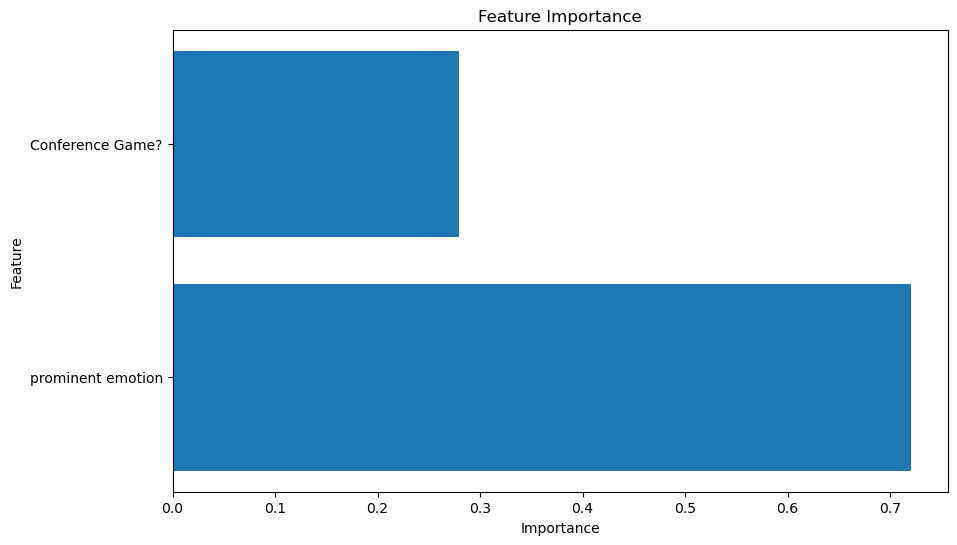

In [226]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


#### Gradient Boosting

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

X = df[['prominent emotion', 'Conference Game?']]
y = df['O/U']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.50      0.40      0.44         5

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13



#### Support Vector Machines

In [149]:
from sklearn.svm import SVC

X = df[['prominent emotion', 'Conference Game?']]
y = df['Full Time Win or Loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = SVC(kernel='rbf', random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.25      0.33         4
         3.0       0.73      0.89      0.80         9

    accuracy                           0.69        13
   macro avg       0.61      0.57      0.57        13
weighted avg       0.66      0.69      0.66        13



### Gaussian Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB

X = df[['prominent emotion', 'Conference Game?']]
y = df['ATS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.60      0.75         5
         3.0       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



### Looping Test Run for 3 Emotion Model

In [191]:
import os
import pandas as pd

folder_path = "data/test-custom/lane/output/" 
output_df = pd.DataFrame(columns=["File Name", "Predicted Emotion"])

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_converted.wav"):
        # Construct the input file path
        input_file = os.path.join(folder_path, filename)

        # Get the predicted emotion using rec.predict
        emotion = rec.predict(input_file)

        # Add the file name and probabilities to the DataFrame
        output_df = pd.concat([output_df, pd.DataFrame({"File Name": [filename], "Predicted Emotion": [emotion]})], ignore_index=True)

# Print the resulting DataFrame
output_df


,File Name,Predicted Emotion


### Attribution
@software{speech_emotion_recognition_2019,
  author       = {Abdeladim Fadheli},
  title        = {Speech Emotion Recognition},
  version      = {1.0.0},
  year         = {2019},
  publisher    = {GitHub},
  journal      = {GitHub repository},
  url          = {https://github.com/x4nth055/emotion-recognition-using-speech}
}